## Proyecto 1: EDA  información general del personal

#### Nivel: principiantes en Python

#### Objetivo: aplicar algunas instrucciones de pandas para el análisis de datos


EDA  (por sus siglas en inglés exploratory data analysis),  análisis exploratorio de datos, examina la calidad de los datos y hace preguntas respecto a los mismos.




#### Información de la base
La base tiene información de los empleados de una entidad, en el periodo 2001-2005, conformada por 69,930 líneas y 52 columas. 




#### Variables de interés

Al revisar la base se determinaron las variables de interes y se analizaron a traves de cinco preguntas.

no_anio = anio ingreso: total de personas contratadas por año

no_nompla = nombre plaza: total de personas por tipo de plaza

no_nomdep = nombre dependencia: total plazas por dependencia

no_sueldob = sueldo base: sueldo base por tipo de plaza

no_renglon = número reglón: sueldo por reglón presupuestario  

In [44]:
# importar librerías
import pandas as pd 
import numpy as np


In [45]:
# importar librerías
%%capture 
!pip install plotly==5.8.0
import plotly.express as px


In [46]:
# leer data
data_empleados = pd.read_csv('eda_tst.csv' , encoding = "latin1") 


In [47]:
# metadatos
data_empleados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69930 entries, 0 to 69929
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_extran   69930 non-null  int64  
 1   no_anio     69930 non-null  int64  
 2   no_mes      69930 non-null  int64  
 3   no_quin     69930 non-null  int64  
 4   no_partida  68004 non-null  float64
 5   no_codemp   69930 non-null  int64  
 6   no_ncheque  69786 non-null  object 
 7   no_codplaz  69930 non-null  int64  
 8   no_nompla   68006 non-null  object 
 9   no_emple    68006 non-null  object 
 10  no_coddep   69930 non-null  int64  
 11  no_codreal  69930 non-null  int64  
 12  no_totdes   69930 non-null  float64
 13  no_nomdep   68005 non-null  object 
 14  no_fuentef  69930 non-null  int64  
 15  no_diaslab  69930 non-null  int64  
 16  no_sueldpr  69930 non-null  float64
 17  no_sueldob  69930 non-null  float64
 18  no_comple   69930 non-null  float64
 19  no_coperso  69930 non-nul

In [48]:
# valores faltantes por columnas 
numeros_faltantes = data_empleados.isna().sum()
numeros_faltantes


no_extran        0
no_anio          0
no_mes           0
no_quin          0
no_partida    1926
no_codemp        0
no_ncheque     144
no_codplaz       0
no_nompla     1924
no_emple      1924
no_coddep        0
no_codreal       0
no_totdes        0
no_nomdep     1925
no_fuentef       0
no_diaslab       0
no_sueldpr       0
no_sueldob       0
no_comple        0
no_coperso       0
no_coplaza       0
no_bantig        0
no_bprofe        0
no_bpacto        0
no_btrans        0
no_bonvac        0
no_igss          0
no_isr           0
no_montepi       0
no_fianza        0
no_solida        0
no_bantrab       0
no_desjudi       0
no_desan         0
no_acep          0
no_segvida       0
no_tim_a         0
no_tim_e         0
no_tim_i         0
no_ctaprof       0
no_ctasind       0
no_otrdesc       0
no_liquido       0
no_devmes        0
no_renglon    1905
no_estado        0
no_totdev        0
no_bancas        0
no_propor        0
no_ornato        0
no_cuoigss       0
no_muni          0
dtype: int64

ANÁLISIS

se detectó en las columnas de interés faltantes : 
    
no_renglon tiene 1905 faltantes 

no_nompla 1924 faltantes 

no_nomdep 1925 faltantes 

In [49]:
# % de valores faltantes
porcent_numeros_faltantes = data_empleados.isna().mean()*100
porcent_numeros_faltantes


no_extran     0.000000
no_anio       0.000000
no_mes        0.000000
no_quin       0.000000
no_partida    2.754183
no_codemp     0.000000
no_ncheque    0.205920
no_codplaz    0.000000
no_nompla     2.751323
no_emple      2.751323
no_coddep     0.000000
no_codreal    0.000000
no_totdes     0.000000
no_nomdep     2.752753
no_fuentef    0.000000
no_diaslab    0.000000
no_sueldpr    0.000000
no_sueldob    0.000000
no_comple     0.000000
no_coperso    0.000000
no_coplaza    0.000000
no_bantig     0.000000
no_bprofe     0.000000
no_bpacto     0.000000
no_btrans     0.000000
no_bonvac     0.000000
no_igss       0.000000
no_isr        0.000000
no_montepi    0.000000
no_fianza     0.000000
no_solida     0.000000
no_bantrab    0.000000
no_desjudi    0.000000
no_desan      0.000000
no_acep       0.000000
no_segvida    0.000000
no_tim_a      0.000000
no_tim_e      0.000000
no_tim_i      0.000000
no_ctaprof    0.000000
no_ctasind    0.000000
no_otrdesc    0.000000
no_liquido    0.000000
no_devmes  

ANÁLISIS

% de faltantes en las columnas de interés son: 
    
no_renglon tiene 2.72% faltantes 

no_nompla 2.75% faltantes 

no_nomdep 2.75% faltantes 

In [50]:
# seleccionar columnas de interés
data_empleados2 = data_empleados[["no_anio" , "no_nompla" , "no_nomdep" , "no_sueldob" , "no_renglon"]]
data_empleados2


,no_anio,no_nompla,no_nomdep,no_sueldob,no_renglon
0,2001,Secretaria de Gerencia,JUNTA DIRECTIVA,2800.0,11.0
1,2001,Piloto de Presidencia,JUNTA DIRECTIVA,1900.0,11.0
2,2001,Gerente General,GERENCIA GENERAL,16000.0,11.0
3,2001,Subgerente General,GERENCIA GENERAL,12000.0,11.0
4,2001,Asistente de Gerencia,GERENCIA GENERAL,3300.0,11.0
...,...,...,...,...,...
69925,2005,Tecnico en Informatica,REGIONAL DE PETEN,600.0,11.0
69926,2005,Secretaria Ejecutiva II,REGIONAL DE PETEN,2000.0,11.0
69927,2005,Dibujante,REGIONAL DE PETEN,2000.0,11.0
69928,2005,Dibujante,REGIONAL DE PETEN,2000.0,11.0


In [51]:
# renombrar columnas
data_empleados2 = data_empleados2.rename(columns = {"no_anio": "anio_ingreso" , "no_nompla" : "plaza", "no_nomdep" : "dependencia" , "no_sueldob" : "sueldo_base" , "no_renglon" :"reglon_presupuestario"})
data_empleados2


,anio_ingreso,plaza,dependencia,sueldo_base,reglon_presupuestario
0,2001,Secretaria de Gerencia,JUNTA DIRECTIVA,2800.0,11.0
1,2001,Piloto de Presidencia,JUNTA DIRECTIVA,1900.0,11.0
2,2001,Gerente General,GERENCIA GENERAL,16000.0,11.0
3,2001,Subgerente General,GERENCIA GENERAL,12000.0,11.0
4,2001,Asistente de Gerencia,GERENCIA GENERAL,3300.0,11.0
...,...,...,...,...,...
69925,2005,Tecnico en Informatica,REGIONAL DE PETEN,600.0,11.0
69926,2005,Secretaria Ejecutiva II,REGIONAL DE PETEN,2000.0,11.0
69927,2005,Dibujante,REGIONAL DE PETEN,2000.0,11.0
69928,2005,Dibujante,REGIONAL DE PETEN,2000.0,11.0


In [52]:
# ver tipo de data seleccionada
data_empleados2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69930 entries, 0 to 69929
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anio_ingreso           69930 non-null  int64  
 1   plaza                  68006 non-null  object 
 2   dependencia            68005 non-null  object 
 3   sueldo_base            69930 non-null  float64
 4   reglon_presupuestario  68025 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB


## PREGUNTA 1: total de personas contratados por año

In [9]:
# agrupar por año de ingreso 
personas_contradas_xanio = data_empleados2.groupby(['anio_ingreso'])
personas_contradas_xanio.size()


anio_ingreso
1997    5441
1998    7963
1999    7860
2000    8519
2001    8659
2002    8657
2003    8974
2004    9885
2005    3972
dtype: int64

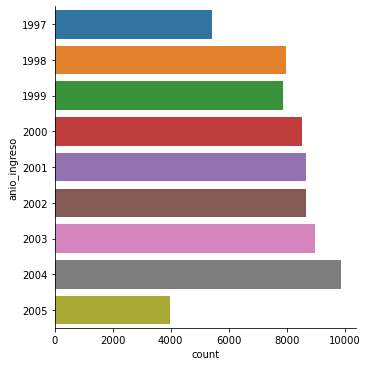

In [8]:
# gráfica total de personas contratadas por año
import seaborn as sns
sns.catplot(y = "anio_ingreso", data = data_empleados2, kind = "count")


## PREGUNTA 2: total de personas por tipo de plaza

In [54]:
# agrupar por tipo de plaza 
total_tipoplaza1 = data_empleados2.groupby(['plaza'])
total_tipoplaza1.size()


plaza
Analista Fisico Quimico    441
Analista Microbiologico    294
Analista Presupuestario    256
Analista de Cartera        684
Analista de Creditos       430
                          ... 
Técnico III                467
Técnico Profesional I      795
Técnico Profesional II     671
Técnico Profesional III    213
profesional I                1
Length: 163, dtype: int64

In [55]:
# total de plazas por tipo
total_tipoplaza2 = data_empleados2["plaza"].value_counts()
total_tipoplaza2


Secretaria Ejecutiva I                 2953
Profesional I                          2619
Secretaria Ejecutiva II                2425
Auxiliar Asesoria Financiera Munici    2122
Contador                               2046
                                       ... 
Trabajador Especializado II              48
Oficinista I                             29
Jefe Tecnico II                          25
Auxiliar de Capacitacion Municipal       12
profesional I                             1
Name: plaza, Length: 163, dtype: int64

In [56]:
# total de personas contratadas por año y por tipo de plaza
total_tipoplaza3 = data_empleados2.groupby(["anio_ingreso" , 'plaza'])
total_tipoplaza3.size()


anio_ingreso  plaza                           
1997          Asistente Profesional III             9
              Asistente profesional II              9
              Auditor Jefe                          9
              Auxiliar de Bodega                   27
              Conserje                             41
                                                 ... 
2005          Supervisor de Prestaciones           12
              Supervisor de Tesorer¡a              12
              Tecnico de Servicios Municipales     60
              Tecnico en Informatica              132
              Topografo                            24
Length: 867, dtype: int64

In [57]:
# total de personas contratadas por tipo de plaza y año de ingreso
total_tipoplaza3 = data_empleados2.groupby(['plaza' , "anio_ingreso" ])
total_tipoplaza3.size()


plaza                    anio_ingreso
Analista Fisico Quimico  2000             75
                         2001             78
                         2002             81
                         2003             84
                         2004             87
                                        ... 
Técnico Profesional II   1999            599
                         2000             72
Técnico Profesional III  1999            191
                         2000             22
profesional I            1999              1
Length: 867, dtype: int64

## PREGUNTA 3: total de plaza por dependencia

In [58]:
totalplaza_pordependencia = data_empleados2.groupby(["dependencia" , "plaza"])
totalplaza_pordependencia.size()


dependencia                                 plaza                              
AREA DE ASESORIA ADMINISTRATIVA             Asesor Administrativo Municipal        286
                                            Auxiliar Asesoria Administrativa Mu    419
AREA DE ASESORIA ADMINISTRATIVA FINANCIERA  Secretaria Ejecutiva I                 147
                                            Sub-director Asesoria Administrativ    144
AREA DE ASESORIA FINANCIERA                 Asesor Financiero Municipal            294
                                                                                  ... 
UNIDAD FINANCIERA                           Asistente Administrativo/Financiero    147
                                            Director Financiero                    146
                                            Mensajero                              118
                                            Secretaria Ejecutiva II                147
                                            Secret

## PREGUNTA 4: sueldo base por tipo de plaza

In [59]:
sueldobase_tipoplaza = data_empleados2.groupby(["plaza" , "sueldo_base"])
sueldobase_tipoplaza.size()


plaza                    sueldo_base
Analista Fisico Quimico  126.0            3
                         450.0            3
                         2000.0           3
                         2200.0           3
                         2800.0         150
                                       ... 
Técnico Profesional III  1942.0           2
                         1960.0           3
                         1975.0           4
                         2000.0          13
profesional I            2745.0           1
Length: 2329, dtype: int64

## PREGUNTA 5 : sueldo  por reglón presupuestario

In [60]:
sueldobase_porreglon = data_empleados2.groupby(["reglon_presupuestario" , "sueldo_base"])
sueldobase_porreglon .size()


reglon_presupuestario  sueldo_base
11.0                   0.00           40
                       36.28           1
                       37.50           1
                       42.00           1
                       50.79           1
                                      ..
31.0                   991.00          9
                       1036.00         6
                       1150.00        11
                       1191.00         2
                       1310.00         1
Length: 805, dtype: int64

In [30]:
# total de personas por tipo de reglón presupuestario
tipo_reglonpresupuestario = data_empleados2["reglon_presupuestario"].value_counts()
tipo_reglonpresupuestario


11.0    67804
31.0      221
Name: reglon_presupuestario, dtype: int64

### time: 16 h